In [1]:
# Import 
import pandas as pd
import numpy as np

In [2]:
heart_disease = pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
X = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

In [4]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [5]:
## Fit model
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)
rf_clf.score(X_test,y_test)

0.8524590163934426

In [6]:
## Cross validateion

In [7]:
from sklearn.model_selection import cross_val_score
cvs = cross_val_score(rf_clf,X_train,y_train,cv=10) # score() # mean accuracy

In [8]:
print(f'Mean of Our Model {cvs.mean()*100:.2f} %')
print(f'Standard Deviation {np.std(cvs)}')

Mean of Our Model 79.75 %
Standard Deviation 0.06572776345570333


In [9]:
y_predict = rf_clf.predict(X_test)
## Confusion Matrix
from sklearn.metrics import confusion_matrix,plot_confusion_matrix
confusion_matrix(y_test,y_predict)   # [[(0,0),(0,1)
                                     #  (1,0),(1,1)]]

array([[25,  3],
       [ 6, 27]], dtype=int64)

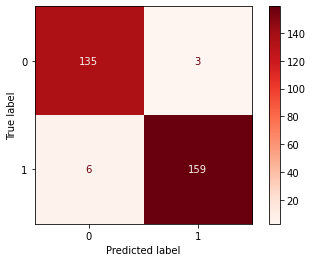

In [10]:
plot_confusion_matrix(rf_clf,X,y,cmap='Reds')

In [11]:
## ROC Curev
from sklearn.metrics import roc_curve

In [12]:
y_predict

array([1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1], dtype=int64)

In [13]:
y_pred_pro = rf_clf.predict_proba(X_test)

In [14]:
y_pred_pro[:5] # probaility of class class 0 class 1 < 1. 94 % 6% => 0  > 

array([[0.05, 0.95],
       [0.42, 0.58],
       [0.84, 0.16],
       [0.84, 0.16],
       [0.77, 0.23]])

In [15]:
y_pred_pro.shape

(61, 2)

In [16]:
positive_prob = y_pred_pro[:,1]
positive_prob

array([0.95, 0.58, 0.16, 0.16, 0.23, 0.08, 0.74, 0.44, 0.13, 0.43, 0.25,
       0.12, 0.88, 0.28, 0.77, 0.64, 0.4 , 0.57, 0.15, 0.83, 0.61, 0.45,
       0.07, 0.34, 0.05, 0.52, 0.57, 0.09, 0.82, 0.47, 0.93, 0.13, 0.75,
       0.19, 0.8 , 0.33, 0.07, 0.05, 0.74, 0.45, 0.99, 0.01, 0.04, 0.9 ,
       0.69, 0.62, 0.84, 0.79, 0.94, 0.12, 0.53, 0.44, 0.65, 0.44, 0.48,
       0.55, 0.89, 0.79, 0.53, 0.3 , 0.55])

In [17]:
fpr,tpr,thresholds = roc_curve(y_test,positive_prob)

In [18]:
import matplotlib.pyplot as plt

In [19]:
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color='red',label='ROC Curve')
    plt.plot([0,1],[0,1],color='darkblue',linestyle='--',label='Guessing')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('Receiver Operating Characteristics Curve')

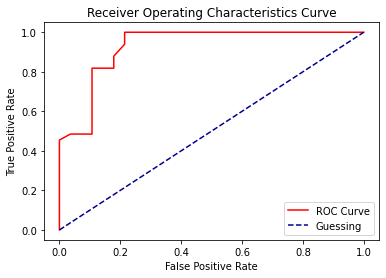

In [20]:
plot_roc_curve(fpr,tpr)

In [21]:
# Theory Curve
fpr,tpr,thresholds = roc_curve(y_test,y_test)

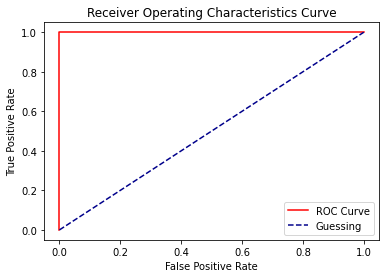

In [22]:
plot_roc_curve(fpr,tpr)

In [23]:
# Area under the Curve AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test,positive_prob)
auc

0.928030303030303

In [24]:
## Classification Report
from sklearn.metrics import classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.90      0.82      0.86        33

    accuracy                           0.85        61
   macro avg       0.85      0.86      0.85        61
weighted avg       0.86      0.85      0.85        61



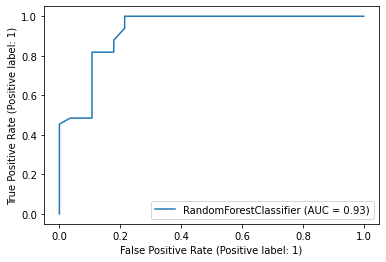

In [25]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(rf_clf,X_test,y_test)

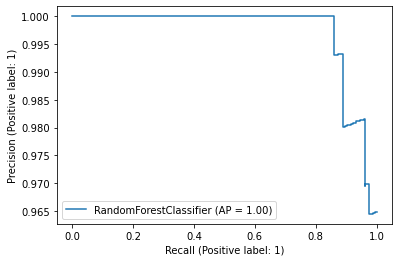

In [26]:
from sklearn.metrics import plot_precision_recall_curve
plot_precision_recall_curve(rf_clf,X,y)

In [27]:
# improve model with Grid Search CV
from sklearn.model_selection import GridSearchCV

In [29]:
clf = RandomForestClassifier()
grid = {
    "n_estimators":[50,100,150,200,250], # 5
    "criterion":["gini","entropy"], # 2
    "max_features":["auto","sqrt","log2"] # 3 => 30 x 5 = 150
}

Grid_Clf = GridSearchCV(clf,grid,cv=5,verbose=2)
Grid_Clf.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END .criterion=gini, max_features=auto, n_estimators=50; total time=   0.5s
[CV] END .criterion=gini, max_features=auto, n_estimators=50; total time=   0.4s
[CV] END .criterion=gini, max_features=auto, n_estimators=50; total time=   0.5s
[CV] END .criterion=gini, max_features=auto, n_estimators=50; total time=   0.3s
[CV] END .criterion=gini, max_features=auto, n_estimators=50; total time=   0.5s
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time=   0.8s
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time=   0.3s
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time=   0.9s
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time=   0.5s
[CV] END criterion=gini, max_features=auto, n_estimators=100; total time=   0.4s
[CV] END criterion=gini, max_features=auto, n_estimators=150; total time=   0.6s
[CV] END criterion=gini, max_features=auto, n_e

[CV] END criterion=entropy, max_features=sqrt, n_estimators=50; total time=   0.0s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=50; total time=   0.1s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=50; total time=   0.4s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=50; total time=   0.2s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=100; total time=   0.6s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=100; total time=   0.3s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=100; total time=   0.4s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=150; total time=   0.5s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=150; total time=   0.7s
[CV] END criterion=entropy, max_features=sqrt, n_estimators=150; total time=   0

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200, 250]},
             verbose=2)

In [30]:
Grid_Clf.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 200}

In [31]:
Grid_Clf.score(X_test,y_test)

0.8852459016393442

In [32]:
P_pro = Grid_Clf.predict_proba(X_test)

In [34]:
fpr,tpr,thresholds = roc_curve(y_test,P_pro[:,1])

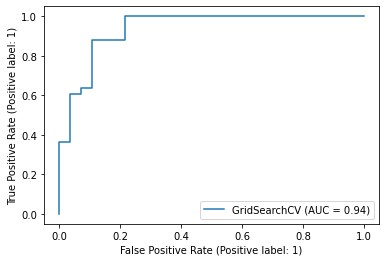

In [37]:
plot_roc_curve(Grid_Clf,X_test,y_test)

In [38]:
## save model
from joblib import dump,load

In [40]:
### Save model
dump(Grid_Clf,filename='Best_Classifier.joblib')

['Best_Classifier.joblib']

In [41]:
### Loading Model
clf = load(filename="Best_Classifier.joblib")

In [42]:
clf.score(X_test,y_test)

0.8852459016393442